In [5]:
import pandas as pd
#read txt file into dataframe
df = pd.read_csv("/Users/franco.benites/dm2025b/dm/datasets/gridsearch_detalle.txt", sep="\t", header=None)

df.head(5)





,0,1,2,3,4,5
0,semilla,cp,maxdepth,minsplit,minbucket,ganancia_test
1,810881,-0.5,4,1000,300,47450000
2,810881,-0.5,4,1000,300,47450000
3,810881,-0.5,4,1000,300,47450000
4,810881,-0.5,4,1000,300,47450000


In [ ]:
#use first row as header


In [6]:
# Instead of header=None, use header=0 (first row as header)
df_headers = pd.read_csv("/Users/franco.benites/dm2025b/dm/datasets/gridsearch_detalle.txt", sep="\t", header=0)
df_headers.head(5)

,semilla,cp,maxdepth,minsplit,minbucket,ganancia_test
0,810881,-0.5,4,1000,300,47450000
1,810881,-0.5,4,1000,300,47450000
2,810881,-0.5,4,1000,300,47450000
3,810881,-0.5,4,1000,300,47450000
4,810881,-0.5,4,1000,300,47450000


In [9]:
df_sorted = df_headers.sort_values(by="ganancia_test", ascending=False).reset_index(drop=True)

In [10]:
df_sorted.head(5)

,semilla,cp,maxdepth,minsplit,minbucket,ganancia_test
0,810881,-0.25,8,200,150,51420000
1,810881,-0.25,8,100,150,51420000
2,810881,-0.50,8,10,150,51420000
3,810881,-0.25,8,10,150,51420000
4,810881,-0.25,8,50,150,51420000


In [14]:
#print row 5
display(df_sorted.iloc[100])

semilla            810881.0
cp                     -0.5
maxdepth                4.0
minsplit             1000.0
minbucket              30.0
ganancia_test    49220000.0
Name: 100, dtype: float64

# Análisis del grupo

In [21]:
#yo
franco = pd.read_csv("/Users/franco.benites/dm2025b/dm/datasets/gridsearch_detalle.txt", sep="\t", header=0)
cristian = pd.read_csv("/Users/franco.benites/dm2025b/dm/datasets/gridsearch_detalle_cz.txt", sep="\t", header=0)
martin = pd.read_csv("/Users/franco.benites/dm2025b/dm/datasets/gridsearch_detalle_ms.txt", sep="\t", header=0)


In [22]:
#append cristian to franco
df = pd.concat([franco, cristian], axis=0)
df = pd.concat([df, martin], axis=0)

In [38]:
df

df.to_csv("/Users/franco.benites/dm2025b/dm/datasets/gridsearch_grupo.csv", index=False)

In [24]:
#filtro cp positivo
df = df[df['cp'] < 0]

In [34]:
print(df['cp'].max())

-0.01


In [26]:
df = df.sort_values(by='ganancia_test', ascending=False).reset_index(drop=True)

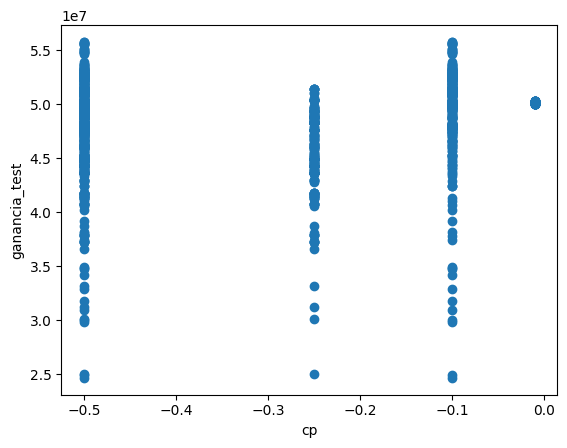

In [ ]:
import matplotlib.pyplot as plt

#scatter plot
#cp vs ganancia_test
plt.scatter(df['cp'], df['ganancia_test'])
plt.xlabel('cp')
plt.ylabel('ganancia_test')
plt.show()



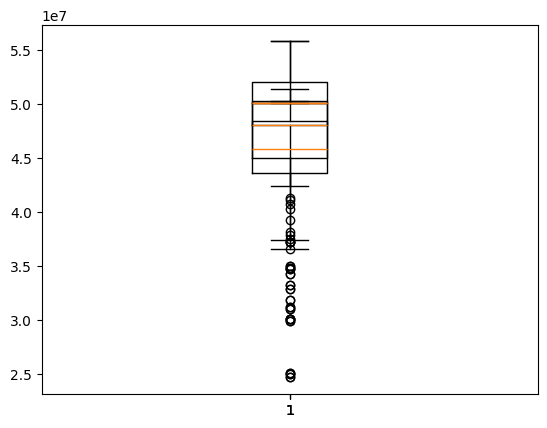

In [35]:
#boxplot for each value of cp
cp05 = df[df['cp'] == -0.5]
cp025 = df[df['cp'] == -0.25]
cp01 = df[df['cp'] == -0.1]
cp001 = df[df['cp'] == -0.01]

plt.boxplot(cp05['ganancia_test'])
plt.boxplot(cp025['ganancia_test'])
plt.boxplot(cp01['ganancia_test'])
plt.boxplot(cp001['ganancia_test'])
plt.show()

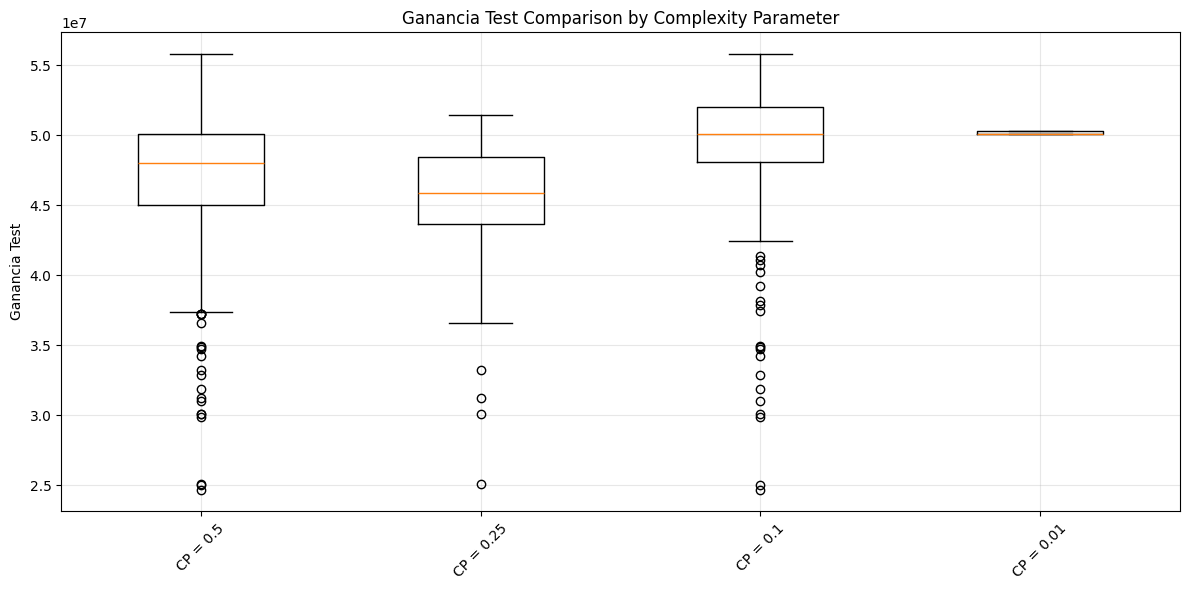

In [39]:
import matplotlib.pyplot as plt

# Create one plot with all boxplots side by side
plt.figure(figsize=(12, 6))

# Combine all data for comparison
data_to_plot = [cp05['ganancia_test'], cp025['ganancia_test'], 
                cp01['ganancia_test'], cp001['ganancia_test']]
labels = ['CP = 0.5', 'CP = 0.25', 'CP = 0.1', 'CP = 0.01']

plt.boxplot(data_to_plot, labels=labels)
plt.title('Ganancia Test Comparison by Complexity Parameter')
plt.ylabel('Ganancia Test')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()